In [ ]:
# https://stable-baselines3.readthedocs.io/en/master/guide/rl.html
# https://spinningup.openai.com/en/latest/spinningup/rl_intro2.html#a-taxonomy-of-rl-algorithms

# 1. Import dependencies

In [8]:
# !pip install stable-baselines3[extra]

In [1]:
import os

In [2]:
!echo $DISPLAY

In [3]:
from IPython import display
import matplotlib.pyplot as plt
import pyvirtualdisplay


_display = pyvirtualdisplay.Display(visible=False,  # use False with Xvfb
                                    size=(1400, 900))
_ = _display.start()

In [4]:
!echo $DISPLAY

:1


In [5]:
import gym 
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy

# 2. Load Environment

In [6]:
environment_name = "CartPole-v0"

In [7]:
env = gym.make(environment_name)

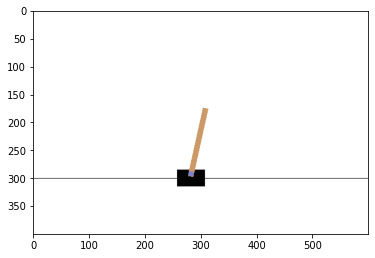

Episode:5 Score:10.0


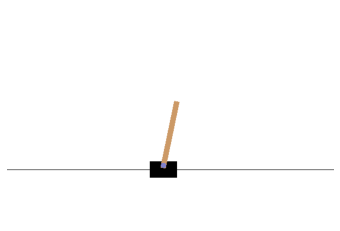

In [15]:
_, ax = plt.subplots(1, 1)
# _, ax = plt.subplots(1, 1, figsize=(6,6))
img = ax.imshow(env.render(mode='rgb_array'))
episodes = 5
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0 
    
    while not done:
        #env.render()
        img.set_data(env.render(mode='rgb_array')) 
        ax.axis('off')
        display.display(plt.gcf())
        display.clear_output(wait=True)
        action = env.action_space.sample()
        n_state, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))
env.close()

# Understanding The Environment
https://github.com/openai/gym/blob/master/gym/envs/classic_control/cartpole.py

In [8]:
# 0-push cart to left, 1-push cart to the right
env.action_space.sample()

1

In [9]:
# [cart position, cart velocity, pole angle, pole angular velocity]
env.observation_space.sample()

array([ 3.6860552e+00,  2.3555627e+38,  2.8559607e-01, -1.5099735e+38],
      dtype=float32)

# 3. Train an RL Model

In [20]:
env = gym.make(environment_name)
env = DummyVecEnv([lambda: env])
model = PPO('MlpPolicy', env, verbose = 1)

Using cpu device


In [21]:
model.learn(total_timesteps=20000)

-----------------------------
| time/              |      |
|    fps             | 1434 |
|    iterations      | 1    |
|    time_elapsed    | 1    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 528         |
|    iterations           | 2           |
|    time_elapsed         | 7           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008882821 |
|    clip_fraction        | 0.0978      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.687      |
|    explained_variance   | -0.00406    |
|    learning_rate        | 0.0003      |
|    loss                 | 7.32        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0158     |
|    value_loss           | 57.8        |
-----------------------------------------
----------------------------------

# 4. Save and Reload Model

In [ ]:
PPO_path = os.path.join('Training', 'Saved_Models', 'PPO_model')

In [15]:
model.save(PPO_path)

/srv/conda/envs/notebook/lib/python3.7/site-packages/stable_baselines3/common/save_util.py:276: UserWarning: Path 'Training/Saved Models' does not exist. Will create it.
  warnings.warn(f"Path '{path.parent}' does not exist. Will create it.")


In [16]:
del model

In [19]:
model = PPO.load('PPO_model', env=env)

FileNotFoundError: [Errno 2] No such file or directory: 'PPO_model.zip'

# 4. Evaluation

In [ ]:
from stable_baselines3.common.evaluation import evaluate_policy

In [ ]:
evaluate_policy(model, env, n_eval_episodes=10, render=True)

In [ ]:
env.close()

# 5. Test Model

In [ ]:
obs = env.reset()
while True:
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    env.render()
    if done: 
        print('info', info)
        break

In [ ]:
env.close()

# 6. Viewing Logs in Tensorboard

In [ ]:
training_log_path = os.path.join(log_path, 'PPO_3')

In [ ]:
!tensorboard --logdir={training_log_path}

# 7. Adding a callback to the training Stage

In [ ]:
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold
import os

In [ ]:
save_path = os.path.join('Training', 'Saved Models')
log_path = os.path.join('Training', 'Logs')

In [ ]:
env = gym.make(environment_name)
env = DummyVecEnv([lambda: env])

In [ ]:
stop_callback = StopTrainingOnRewardThreshold(reward_threshold=190, verbose=1)
eval_callback = EvalCallback(env, 
                             callback_on_new_best=stop_callback, 
                             eval_freq=10000, 
                             best_model_save_path=save_path, 
                             verbose=1)

In [ ]:
model = PPO('MlpPolicy', env, verbose = 1, tensorboard_log=log_path)

In [ ]:
model.learn(total_timesteps=20000, callback=eval_callback)

In [ ]:
model_path = os.path.join('Training', 'Saved Models', 'best_model')
model = PPO.load(model_path, env=env)

In [ ]:
evaluate_policy(model, env, n_eval_episodes=10, render=True)

In [ ]:
env.close()

# 8. Changing Policies

In [ ]:
net_arch=[dict(pi=[128, 128, 128, 128], vf=[128, 128, 128, 128])]

In [ ]:
model = PPO('MlpPolicy', env, verbose = 1, policy_kwargs={'net_arch': net_arch})

In [ ]:
model.learn(total_timesteps=20000, callback=eval_callback)

# 9. Using an Alternate Algorithm

In [ ]:
from stable_baselines3 import DQN

In [ ]:
model = DQN('MlpPolicy', env, verbose = 1, tensorboard_log=log_path)

In [ ]:
model.learn(total_timesteps=20000, callback=eval_callback)

In [ ]:
dqn_path = os.path.join('Training', 'Saved Models', 'DQN_model')

In [ ]:
model.save(dqn_path)

In [ ]:
model = DQN.load(dqn_path, env=env)

In [ ]:
evaluate_policy(model, env, n_eval_episodes=10, render=True)

In [ ]:
env.close()